In [2]:
from tinytorch.tensor import Tensor
from tinytorch.nn import Linear
from tinytorch.activation import ReLU
from tinytorch.module import Module
from tinytorch.optimizer import SGD
from tinytorch.scheduler import ExponentialLR

# Instantiate the model
class MLP(Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = Linear(1, 5)
    self.activation_fn = ReLU()
    self.layer_2 = Linear(5, 1)

  def forward(self, input: Tensor) -> Tensor:
    output = self.layer_1(input)
    output = self.activation_fn(output)
    output = self.layer_2(output)

    return output

model = MLP()
print(model)

MLP(
	layer_1: Linear(in_features=1, out_features=5, bias=True),
	activation_fn: ReLU(),
	layer_2: Linear(in_features=5, out_features=1, bias=True),
)


In [3]:
import numpy as np

# train loop
steps = 30000
learning_rate = 0.0001
dataset_size = 100

# instantiate optimizer
optimizer = SGD(model, learning_rate)

# Create dummy data
inputs = np.random.rand(dataset_size).reshape(-1, 1)
inputs.sort()
targets = inputs ** 2 + 4

inputs = Tensor(inputs, label='inputs')
targets = Tensor(targets, label='targets')

# Training loop
for step in range(steps):
  outputs = model(inputs)
  outputs.label = 'outputs'

  # compute loss
  mse_loss = ((targets - outputs)**Tensor(2)).sum()/targets.shape[0]
  mse_loss.label = 'mse_loss'

  # run backprop
  mse_loss.backward()

  # update weitghts
  optimizer.step()

  # zero gradients for the next step
  optimizer.zero_grad()

  if (step+1) % 1000 == 0 or step == 0:
    print(f"Step {step+1} | Loss {mse_loss.value:.4f}")


Step 1 | Loss 49.0120
Step 1000 | Loss 0.3367
Step 2000 | Loss 0.1261


c:\Users\almei\Documents\GitHub\tinytorch\tinytorch\grads.py:34: RuntimeWarning: invalid value encountered in log
  return second_value*first_value**(second_value-1)*output_grad, ((first_value**second_value)*np.log(first_value)*output_grad).sum()


Step 3000 | Loss 0.0991
Step 4000 | Loss 0.0793
Step 5000 | Loss 0.0643
Step 6000 | Loss 0.0532
Step 7000 | Loss 0.0446
Step 8000 | Loss 0.0379
Step 9000 | Loss 0.0325
Step 10000 | Loss 0.0280
Step 11000 | Loss 0.0243
Step 12000 | Loss 0.0213
Step 13000 | Loss 0.0188
Step 14000 | Loss 0.0167
Step 15000 | Loss 0.0150
Step 16000 | Loss 0.0136
Step 17000 | Loss 0.0125
Step 18000 | Loss 0.0115
Step 19000 | Loss 0.0107
Step 20000 | Loss 0.0101
Step 21000 | Loss 0.0095
Step 22000 | Loss 0.0091
Step 23000 | Loss 0.0087
Step 24000 | Loss 0.0084
Step 25000 | Loss 0.0082
Step 26000 | Loss 0.0080
Step 27000 | Loss 0.0078
Step 28000 | Loss 0.0077
Step 29000 | Loss 0.0075
Step 30000 | Loss 0.0074


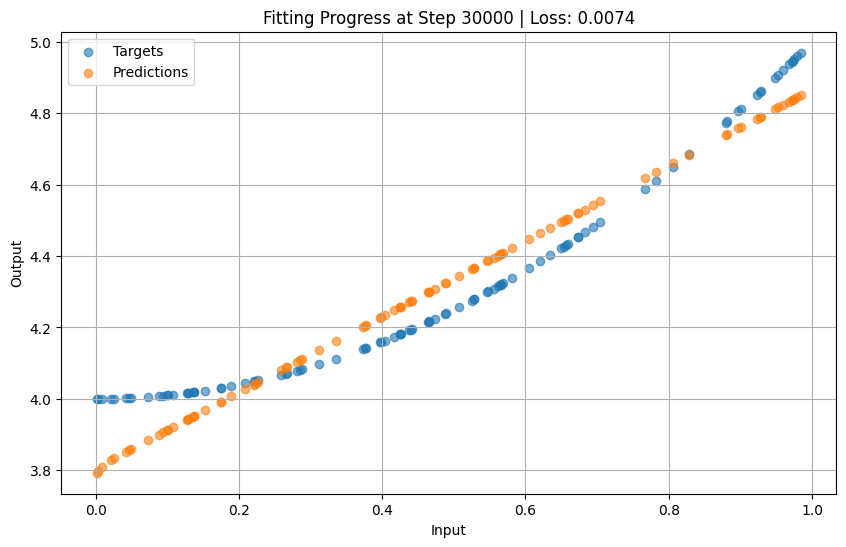

In [4]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_fitting_progress(step, inputs, outputs, targets, mse_loss):
  """
  Plots the progress of the model fitting.

  Args:
    step: The current training step.
    inputs: The input data (Tensor).
    outputs: The model's current predictions (Tensor).
    targets: The target data (Tensor).
    mse_loss: The current MSE loss (Tensor).
  """
  clear_output(wait=True) # Clear previous plot in Colab/Jupyter

  plt.figure(figsize=(10, 6))
  plt.scatter(inputs.value.flatten(), targets.value.flatten(), label='Targets', alpha=0.6)
  plt.scatter(inputs.value.flatten(), outputs.value.flatten(), label='Predictions', alpha=0.6)
  plt.title(f'Fitting Progress at Step {step+1} | Loss: {mse_loss.value:.4f}')
  plt.xlabel('Input')
  plt.ylabel('Output')
  plt.legend()
  plt.grid(True)
  plt.show()

plot_fitting_progress(step, inputs, outputs, targets, mse_loss)

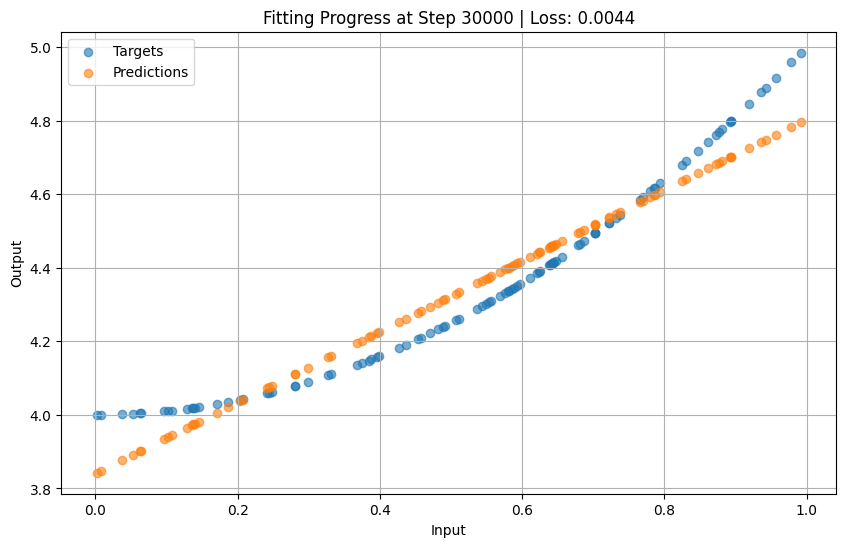

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Define the model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(1, 5)
        self.layer_2 = nn.Linear(5, 1)
        self.activation_fn = nn.ReLU()

    def forward(self, x):
        x = self.layer_1(x)
        x = self.activation_fn(x)
        x = self.layer_2(x)
        return x

# Instantiate the model
model = MLP()
print(model)

# Hyperparameters
steps = 30000
learning_rate = 0.0001
dataset_size = 100

# Data
inputs = torch.rand(dataset_size, 1)
inputs, _ = torch.sort(inputs, dim=0)
targets = inputs ** 2 + 4

# Optimizer and loss
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

# Training loop
for step in range(steps):
    optimizer.zero_grad()

    outputs = model(inputs)
    mse_loss = loss_fn(outputs, targets)

    mse_loss.backward()
    optimizer.step()

    if (step + 1) % 1000 == 0 or step == 0:
        print(f"Step {step+1} | Loss {mse_loss.item():.4f}")

# Plot function
def plot_fitting_progress(step, inputs, outputs, targets, mse_loss):
    clear_output(wait=True)
    plt.figure(figsize=(10, 6))
    plt.scatter(inputs.detach().numpy(), targets.detach().numpy(), label='Targets', alpha=0.6)
    plt.scatter(inputs.detach().numpy(), outputs.detach().numpy(), label='Predictions', alpha=0.6)
    plt.title(f'Fitting Progress at Step {step} | Loss: {mse_loss.item():.4f}')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend()
    plt.grid(True)
    plt.show()

inputs = torch.rand(dataset_size, 1)
inputs, _ = torch.sort(inputs, dim=0)
targets = inputs ** 2 + 4

# Show final fit
plot_fitting_progress(steps, inputs, model(inputs), targets, mse_loss)
